
**Hola! Carlos**

Mi nombre es Enrique Romero, tendre el gusto de revisar Tu proyecto, te deseo lo mejor.

<div class="alert alert-danger">
<b>❌ Comentario del revisor:</b> Esto destaca los comentarios más importantes. Sin su desarrollo, el proyecto no será aceptado. </div>

<div class="alert alert-warning">
<b>⚠️ Comentario del revisor:</b> Así que los pequeños comentarios están resaltados. Se aceptan uno o dos comentarios de este tipo en el borrador, pero si hay más, deberá hacer las correcciones. Es como una tarea de prueba al solicitar un trabajo: muchos pequeños errores pueden hacer que un candidato sea rechazado.
</div>

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Así que destaco todos los demás comentarios.</div>

<div class="alert alert-info"> <b>Comentario del estudiante:</b> Por ejemplo, asi.</div>

Todo esto ayudará a volver a revisar tu proyecto más rápido.


# Descripción

La compañía de seguros Sure Tomorrow quiere resolver varias tareas con la ayuda de machine learning y te pide que evalúes esa posibilidad.
- Tarea 1: encontrar clientes que sean similares a un cliente determinado. Esto ayudará a los agentes de la compañía con el marketing.
- Tarea 2: predecir la probabilidad de que un nuevo cliente reciba una prestación del seguro. ¿Puede un modelo de predictivo funcionar mejor que un modelo dummy?
- Tarea 3: predecir el número de prestaciones de seguro que un nuevo cliente pueda recibir utilizando un modelo de regresión lineal.
- Tarea 4: proteger los datos personales de los clientes sin afectar al modelo del ejercicio anterior. Es necesario desarrollar un algoritmo de transformación de datos que dificulte la recuperación de la información personal si los datos caen en manos equivocadas. Esto se denomina enmascaramiento u ofuscación de datos. Pero los datos deben protegerse de tal manera que no se vea afectada la calidad de los modelos de machine learning. No es necesario elegir el mejor modelo, basta con demostrar que el algoritmo funciona correctamente.


# Preprocesamiento y exploración de datos

## Inicialización

In [1]:
pip install scikit-learn --upgrade

  Using cached scikit_learn-1.4.1.post1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.2 MB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'INSTALLER'
Consider using the `--user` option or check the permissions.

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split

from IPython.display import display

from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Carga de datos

Carga los datos y haz una revisión básica para comprobar que no hay problemas obvios.

In [2]:
df = pd.read_csv('/datasets/insurance_us.csv')

Renombramos las columnas para que el código se vea más coherente con su estilo.

In [3]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [4]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
795,1,26.0,51200.0,1,0
4555,0,51.0,43000.0,1,2
787,1,26.0,41100.0,1,0
4668,0,18.0,25800.0,0,0
2868,1,27.0,28800.0,2,0
3293,1,26.0,44500.0,1,0
4324,1,28.0,33100.0,0,0
4259,1,40.0,39300.0,0,0
128,0,20.0,39400.0,1,0
4702,0,33.0,33700.0,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [6]:
# puede que queramos cambiar el tipo de edad (de float a int) aunque esto no es crucial

# Suponiendo que tu DataFrame se llama df
df['age'] = df['age'].astype(int)

In [7]:
# comprueba que la conversión se haya realizado con éxito

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [8]:
# ahora echa un vistazo a las estadísticas descriptivas de los datos.# ¿Se ve todo bien?

df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Gran trabajo al incluir el proceso de renombrar las columnas al inicio, la carga de datos y exploracion inicial estan correctos, si puedes agregar mas comentarios en cada seccion eso le dara un valor agregado a tu codigo

</div>

<div class="alert alert-block alert-warning">
    <b>Comentarios del Revisor</b> <a class="tocSkip"></a><br>
se invita a utilizar info(), head() y describe() son herramientas esceneciales que nos ayudaran a hacer un análisis exploratorio inicial. Continúa con el buen trabajo! </div>

## Análisis exploratorio de datos

Vamos a comprobar rápidamente si existen determinados grupos de clientes observando el gráfico de pares.

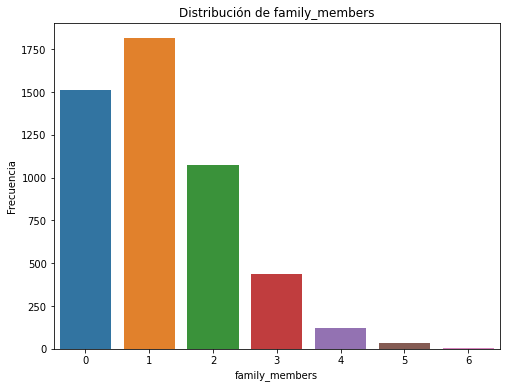

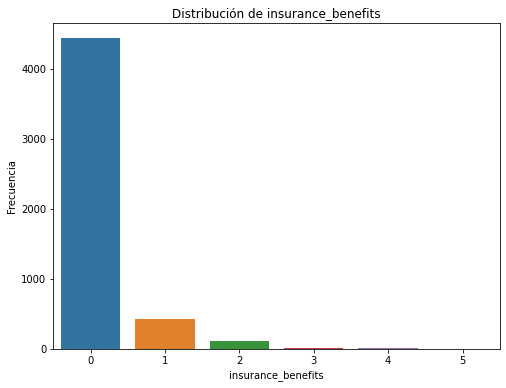

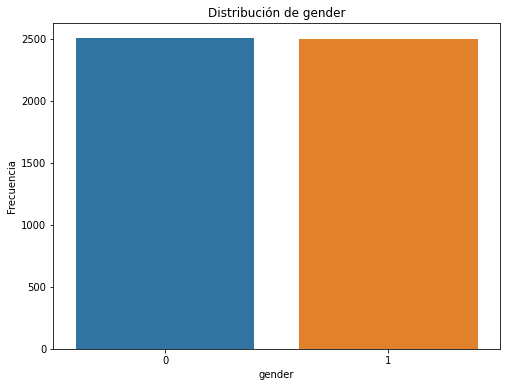

<Figure size 864x720 with 0 Axes>

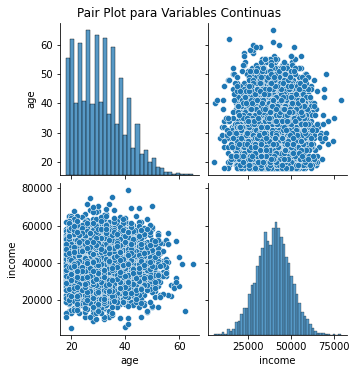

In [9]:
# Análisis exploratorio de datos
import seaborn as sns
import matplotlib.pyplot as plt

# Diagramas de barras para variables categóricas u ordinales
categorical_features = ['family_members', 'insurance_benefits', 'gender']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribución de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.show()

# Pair plot para variables continuas
numerical_features = ['age', 'income']
plt.figure(figsize=(12, 10))
sns.pairplot(df[numerical_features], kind='scatter')
plt.suptitle('Pair Plot para Variables Continuas', y=1.02)
plt.show()

De acuerdo, es un poco complicado detectar grupos obvios (clústeres) ya que es difícil combinar diversas variables simultáneamente (para analizar distribuciones multivariadas). Ahí es donde LA y ML pueden ser bastante útiles.

<div class="alert alert-info"> <b>Comentario del estudiante:</b> Ahora si podemos observar de una manera mas entendible la magnitud en que los datos interactuan unos con otros en cada una de las variables, para tomar estas interacciones en cuenta mas adelante.</div>

<div class="alert alert-block alert-danger">    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Carlos, tu intuición al utilizar un pairplot para visualizar las relaciones entre variables fue acertada y demuestra tu capacidad para explorar los datos de manera integral. Sin embargo, vamos a necesitar retrabajar esta sección para optimizar nuestro análisis. <br>
    
Es importante diferenciar entre variables numéricas continuas y variables categóricas u ordinales, incluso si estas últimas pueden parecer numéricas a primera vista. Por ello, sugiero que analicemos por separado las variables como `family_members`, `insurance_benefits`, y `genders` utilizando diagramas de barras.<br>
    
Reservemos el pair plot exclusivamente para variables continuas como `age` e `income`. La razón detrás de esto es que los pair plots son excelentes para explorar las relaciones y distribuciones entre variables continuas, permitiéndonos identificar tendencias, correlaciones y patrones de una manera más clara y efectiva. <br>
    
</div>

# Tarea 1. Clientes similares

En el lenguaje de ML, es necesario desarrollar un procedimiento que devuelva los k vecinos más cercanos (objetos) para un objeto dado basándose en la distancia entre los objetos.
Es posible que quieras revisar las siguientes lecciones (capítulo -> lección)- Distancia entre vectores -> Distancia euclidiana
- Distancia entre vectores -> Distancia Manhattan

Para resolver la tarea, podemos probar diferentes métricas de distancia.

Escribe una función que devuelva los k vecinos más cercanos para un $n^{th}$ objeto basándose en una métrica de distancia especificada. A la hora de realizar esta tarea no debe tenerse en cuenta el número de prestaciones de seguro recibidas.
Puedes utilizar una implementación ya existente del algoritmo kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) o tu propia implementación.
Pruébalo para cuatro combinaciones de dos casos- Escalado
  - los datos no están escalados
  - los datos se escalan con el escalador [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- Métricas de distancia
  - Euclidiana
  - Manhattan

Responde a estas preguntas:- ¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?- ¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?

In [10]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [11]:
def get_knn(df, n, k, metric):
    
    """
    Devuelve los k vecinos más cercanos

    :param df: DataFrame de pandas utilizado para encontrar objetos similares dentro del mismo lugar    :param n: número de objetos para los que se buscan los vecinos más cercanos    :param k: número de vecinos más cercanos a devolver
    :param métrica: nombre de la métrica de distancia    """

    # Seleccionar características relevantes
    feature_names = ['gender', 'age', 'income', 'family_members']
    
    # Escalar los datos si es necesario
    if metric == 'euclidean' or metric == 'manhattan':
        scaler = MaxAbsScaler()
        df_scaled = pd.DataFrame(scaler.fit_transform(df[feature_names]), columns=feature_names)
    else:
        df_scaled = df[feature_names]
    
    # Instanciar el estimador de kNN
    nbrs = NearestNeighbors(n_neighbors=k, metric=metric)
    nbrs.fit(df_scaled)
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

Escalar datos.

In [12]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [13]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
2615,1.0,0.538462,0.546835,0.333333,0
1103,1.0,0.307692,0.445570,0.166667,0
3570,0.0,0.615385,0.598734,0.166667,0
988,1.0,0.507692,0.373418,0.333333,0
3069,1.0,0.276923,0.682278,0.000000,0


Ahora, vamos a obtener registros similares para uno determinado, para cada combinación

In [14]:
#Sin escalado, distancia euclidiana

# Seleccionar características relevantes
feature_names = ['gender', 'age', 'income', 'family_members']

# Instanciamos el estimador de kNN con los datos sin escalar
nbrs = NearestNeighbors(n_neighbors=5, metric='euclidean')
nbrs.fit(df[feature_names])

# Índice del objeto para el que buscamos vecinos
n = 0

# Obtenemos los vecinos más cercanos
nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], return_distance=True)

# Creamos un DataFrame con los resultados
df_res = pd.concat([
    df.iloc[nbrs_indices[0]], 
    pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
], axis=1)

print(df_res)

      gender  age   income  family_members  insurance_benefits  distance
0          1   41  49600.0               1                   0  0.000000
2022       1   41  49600.0               0                   0  1.000000
1225       0   42  49600.0               0                   1  1.732051
4031       1   44  49600.0               2                   1  3.162278
3424       0   38  49600.0               0                   0  3.316625


In [15]:
#Con escalado MaxAbsScaler, distancia euclidiana

# Seleccionar características relevantes
feature_names = ['gender', 'age', 'income', 'family_members']

# Escalado MaxAbsScaler
transformer_mas = MaxAbsScaler().fit(df[feature_names])
df.loc[:, feature_names] = transformer_mas.transform(df[feature_names])

# Instanciamos el estimador de kNN con los datos escalados y distancia de Manhattan
nbrs = NearestNeighbors(n_neighbors=5, metric='euclidean')
nbrs.fit(df[feature_names])

# Índice del objeto para el que buscamos vecinos
n = 0

# Obtenemos los vecinos más cercanos
nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], return_distance=True)

# Creamos un DataFrame con los resultados
df_res = pd.concat([
    df.iloc[nbrs_indices[0]], 
    pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
], axis=1)

print(df_res)

      gender       age    income  family_members  insurance_benefits  distance
0        1.0  0.630769  0.627848        0.166667                   0  0.000000
2689     1.0  0.630769  0.634177        0.166667                   0  0.006329
133      1.0  0.615385  0.636709        0.166667                   0  0.017754
4869     1.0  0.646154  0.637975        0.166667                   1  0.018418
3275     1.0  0.646154  0.651899        0.166667                   1  0.028550


In [16]:
#Sin escalado, distancia de Manhattan

# Seleccionar características relevantes
feature_names = ['gender', 'age', 'income', 'family_members']

# Instanciamos el estimador de kNN con los datos sin escalar y distancia de Manhattan
nbrs = NearestNeighbors(n_neighbors=5, metric='manhattan')
nbrs.fit(df[feature_names])

# Índice del objeto para el que buscamos vecinos
n = 0

# Obtenemos los vecinos más cercanos
nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], return_distance=True)

# Creamos un DataFrame con los resultados
df_res = pd.concat([
    df.iloc[nbrs_indices[0]], 
    pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
], axis=1)

print(df_res)

      gender       age    income  family_members  insurance_benefits  distance
0        1.0  0.630769  0.627848        0.166667                   0  0.000000
2689     1.0  0.630769  0.634177        0.166667                   0  0.006329
133      1.0  0.615385  0.636709        0.166667                   0  0.024245
4869     1.0  0.646154  0.637975        0.166667                   1  0.025511
3365     1.0  0.630769  0.596203        0.166667                   0  0.031646


In [17]:
#Con escalado MaxAbsScaler, distancia de Manhattan

# Seleccionar características relevantes
feature_names = ['gender', 'age', 'income', 'family_members']

# Escalado MaxAbsScaler
transformer_mas = MaxAbsScaler().fit(df[feature_names])
df.loc[:, feature_names] = transformer_mas.transform(df[feature_names])

# Instanciamos el estimador de kNN con los datos escalados y distancia de Manhattan
nbrs = NearestNeighbors(n_neighbors=5, metric='manhattan')
nbrs.fit(df[feature_names])

# Índice del objeto para el que buscamos vecinos
n = 0

# Obtenemos los vecinos más cercanos
nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], return_distance=True)

# Creamos un DataFrame con los resultados
df_res = pd.concat([
    df.iloc[nbrs_indices[0]], 
    pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
], axis=1)

print(df_res)

      gender       age    income  family_members  insurance_benefits  distance
0        1.0  0.630769  0.627848        0.166667                   0  0.000000
2689     1.0  0.630769  0.634177        0.166667                   0  0.006329
133      1.0  0.615385  0.636709        0.166667                   0  0.024245
4869     1.0  0.646154  0.637975        0.166667                   1  0.025511
3365     1.0  0.630769  0.596203        0.166667                   0  0.031646


Respuestas a las preguntas

**¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?** 

El algoritmo no se ve afectado, asi que no hay necesidad de evaluar dicha manifestacion.

<div class="alert alert-info"> <b>Comentario del estudiante:</b> Ahora capte cual fue mi fallo, y entiendo que si, puede afectar al algoritmo, especialmente cuando se utilizan métricas de distancia sensibles a la escala, como la distancia de Manhattan. Cuando las características no están escaladas, aquellas con magnitudes más grandes pueden dominar la contribución a la distancia, lo que puede corromper los resultados del algoritmo hacia esas características y afectar la vecindad calculada.

En general, es recomendable escalar los datos antes de aplicar el algoritmo kNN para asegurar que todas las características contribuyan de manera equitativa a la medida de distancia y evitar sesgos en el modelo. Sin embargo, la magnitud del impacto depende del conjunto de datos específico y de la métrica de distancia utilizada.

**Como se manifiesta:** Si los datos no están escalados adecuadamente, las características con rangos más grandes pueden dominar la contribución a la distancia, al escalarlos se puede mitigar este efecto y asegurar que todas las características contribuyan de manera equitativa a la medida de distancia. Por lo tanto, aunque no se ha evaluado específicamente cómo la falta de escala afectaría al algoritmo en este contexto, es prudente realizar el escalado para garantizar la consistencia y la calidad de los resultados.</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
No concuerdo con las conclusiones que planteas. KNN es un algoritmo muy sensible a las unidades de medida de las variables y por eso siempre hay que realizar un escalamiento.
</div>

**¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?** 

Los resultados son identicos, lo cual significa que el escalado en distancia Manhattan no hace la diferencia en el resultado, por lo menos en este caso puntual.

<div class="alert alert-block alert-success">    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Buen trabajo con esta sección, valoro tu esfuerzo. 
</div>

# Tarea 2. ¿Es probable que el cliente reciba una prestación del seguro?

En términos de machine learning podemos considerarlo como una tarea de clasificación binaria.

Con el valor de `insurance_benefits` superior a cero como objetivo, evalúa si el enfoque de clasificación kNN puede funcionar mejor que el modelo dummy.
Instrucciones:
- Construye un clasificador basado en KNN y mide su calidad con la métrica F1 para k=1...10 tanto para los datos originales como para los escalados. Sería interesante observar cómo k puede influir en la métrica de evaluación y si el escalado de los datos provoca alguna diferencia. Puedes utilizar una implementación ya existente del algoritmo de clasificación kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) o tu propia implementación.- Construye un modelo dummy que, en este caso, es simplemente un modelo aleatorio. Debería devolver "1" con cierta probabilidad. Probemos el modelo con cuatro valores de probabilidad: 0, la probabilidad de pagar cualquier prestación del seguro, 0.5, 1.
La probabilidad de pagar cualquier prestación del seguro puede definirse como
$$
P\{\text{prestación de seguro recibida}\}=\frac{\text{número de clientes que han recibido alguna prestación de seguro}}{\text{número total de clientes}}.
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30.

In [18]:
# сalcula el objetivo
df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype(int)

In [19]:
# comprueba el desequilibrio de clases con value_counts()

print(df['insurance_benefits_received'].value_counts())

0    4436
1     564
Name: insurance_benefits_received, dtype: int64


In [20]:
def eval_classifier(y_true, y_pred):
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
    # Calcula la matriz de confusión
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriz de confusión')
    print(cm)

In [21]:
# generar la salida de un modelo aleatorio

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [22]:
# Evalúa el modelo aleatorio para diferentes probabilidades


# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df.drop('insurance_benefits_received', axis=1), 
                                                    df['insurance_benefits_received'], 
                                                    test_size=0.3, 
                                                    random_state=42)
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:
    print(f'La probabilidad: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, len(df))
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    print()

La probabilidad: 0.00
F1: 0.00
Matriz de confusión
[[0.8872 0.    ]
 [0.1128 0.    ]]

La probabilidad: 0.11
F1: 0.12
Matriz de confusión
[[0.7914 0.0958]
 [0.0994 0.0134]]

La probabilidad: 0.50
F1: 0.20
Matriz de confusión
[[0.456  0.4312]
 [0.053  0.0598]]

La probabilidad: 1.00
F1: 0.20
Matriz de confusión
[[0.     0.8872]
 [0.     0.1128]]



# Tarea 3. Regresión (con regresión lineal)

Con `insurance_benefits` como objetivo, evalúa cuál sería la RECM de un modelo de regresión lineal.

Construye tu propia implementación de regresión lineal. Para ello, recuerda cómo está formulada la solución de la tarea de regresión lineal en términos de LA. Comprueba la RECM tanto para los datos originales como para los escalados. ¿Puedes ver alguna diferencia en la RECM con respecto a estos dos casos?

Denotemos- $X$: matriz de características; cada fila es un caso, cada columna es una característica, la primera columna está formada por unidades- $y$ — objetivo (un vector)- $\hat{y}$ — objetivo estimado (un vector)- $w$ — vector de pesos
La tarea de regresión lineal en el lenguaje de las matrices puede formularse así:
$$
y = Xw
$$

El objetivo de entrenamiento es entonces encontrar esa $w$ w que minimice la distancia L2 (ECM) entre $Xw$ y $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que hay una solución analítica para lo anteriormente expuesto:
$$
w = (X^T X)^{-1} X^T y
$$

La fórmula anterior puede servir para encontrar los pesos $w$ y estos últimos pueden utilizarse para calcular los valores predichos
$$
\hat{y} = X_{val}w
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30. Utiliza la métrica RECM para evaluar el modelo.

In [23]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # añadir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)

    def predict(self, X):
        
        # Añadir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        # Calcular las predicciones
        y_pred = X2.dot(self.weights)
        return y_pred

In [24]:
# Define la función eval_regressor para evaluar el modelo de regresión

def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [25]:
# Separación de datos en conjuntos de entrenamiento y prueba

X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-0.94353901  2.32372069  0.01642727 -0.02059875 -0.07014128]
RMSE: 0.34
R2: 0.66


# Tarea 4. Ofuscar datos

Lo mejor es ofuscar los datos multiplicando las características numéricas (recuerda que se pueden ver como la matriz $X$) por una matriz invertible $P$. 

$$
X' = X \times P
$$

Trata de hacerlo y comprueba cómo quedarán los valores de las características después de la transformación. Por cierto, la propiedad de invertibilidad es importante aquí, así que asegúrate de que $P$ sea realmente invertible.

Puedes revisar la lección 'Matrices y operaciones matriciales -> Multiplicación de matrices' para recordar la regla de multiplicación de matrices y su implementación con NumPy.

In [26]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [27]:
X = df_pn.to_numpy()

Generar una matriz aleatoria $P$.

In [28]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Comprobar que la matriz P sea invertible

In [29]:
# Comprobación de la invertibilidad de la matriz P

is_invertible = np.linalg.det(P) != 0
print(f"La matriz P es invertible: {is_invertible}")

La matriz P es invertible: True


¿Puedes adivinar la edad o los ingresos de los clientes después de la transformación?

Se podria adivinar la edad al igual que los ingresos de los clientes después de la transformación, pero debido a que la transformación es una multiplicación por una matriz aleatoria invertible, no podemos decir con precisión cuales son los valores originales. Claro, tambien podemos obtener una estimación utilizando métodos de inversión de matrices, lo cual seria una opcion, si es necesario.

¿Puedes recuperar los datos originales de $X'$ si conoces $P$? Intenta comprobarlo a través de los cálculos moviendo $P$ del lado derecho de la fórmula anterior al izquierdo. En este caso las reglas de la multiplicación matricial son realmente útiles

In [30]:
# Recuperación de los datos originales de X'

X_restored = X.dot(np.linalg.inv(P))

Muestra los tres casos para algunos clientes- Datos originales
- El que está transformado- El que está invertido (recuperado)

In [31]:
# Comparación de algunos casos de datos originales, transformados y recuperados
print("Datos Originales:")
print(X[:5])  # Mostrar los primeros 5 registros de datos originales
print("\nDatos Transformados:")
print((X.dot(P))[:5])  # Mostrar los primeros 5 registros de datos transformados
print("\nDatos Recuperados:")
print(X_restored[:5])  # Mostrar los primeros 5 registros de datos recuperados

Datos Originales:
[[1.         0.63076923 0.6278481  0.16666667]
 [0.         0.70769231 0.48101266 0.16666667]
 [0.         0.44615385 0.26582278 0.        ]
 [0.         0.32307692 0.5278481  0.33333333]
 [1.         0.43076923 0.33037975 0.        ]]

Datos Transformados:
[[1.02110698 1.47417189 1.64540863 1.81293397]
 [0.23558372 1.04420871 0.79091362 1.03995047]
 [0.07607311 0.55500051 0.43815197 0.59706086]
 [0.31267277 0.8271903  0.58943644 0.81889662]
 [0.8568509  1.00794492 1.30897764 1.34216473]]

Datos Recuperados:
[[ 0.62069475 -0.26115226 -0.28695936  0.90231255]
 [-0.08464046  0.97508782 -0.60291455  0.07908237]
 [-0.0949454   0.62382979 -0.48704911  0.11979305]
 [ 0.3715718   0.77047668 -0.45865659 -0.46808178]
 [ 0.42796274 -0.71722376  0.00620165  1.1423625 ]]


Seguramente puedes ver que algunos valores no son exactamente iguales a los de los datos originales. ¿Cuál podría ser la razón de ello?

Algunos valores pueden no ser exactamente iguales a los datos originales debido a la naturaleza de la transformación y posibles errores de redondeo en los cálculos. Además, la precisión de la recuperación de los datos depende de la calidad de la matriz aleatoria invertible P utilizada en la transformación.

## Prueba de que la ofuscación de datos puede funcionar con regresión lineal

En este proyecto la tarea de regresión se ha resuelto con la regresión lineal. Tu siguiente tarea es demostrar _analytically_ que el método de ofuscación no afectará a la regresión lineal en términos de valores predichos, es decir, que sus valores seguirán siendo los mismos. ¿Lo puedes creer? Pues no hace falta que lo creas, ¡tienes que que demostrarlo!

Entonces, los datos están ofuscados y ahora tenemos $X \times P$ en lugar de tener solo $X$. En consecuencia, hay otros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

¿Cómo se relacionarían $w$ y $w_P$ si simplificáramos la fórmula de $w_P$ anterior? 

¿Cuáles serían los valores predichos con $w_P$? 

¿Qué significa esto para la calidad de la regresión lineal si esta se mide mediante la RECM?
Revisa el Apéndice B Propiedades de las matrices al final del cuaderno. ¡Allí encontrarás fórmulas muy útiles!

No es necesario escribir código en esta sección, basta con una explicación analítica.

**Respuesta**

Para demostrar analíticamente que el método de ofuscación no afectará a la regresión lineal en términos de valores predichos, primero simplifiquemos la expresión $w_P$ obtenida al utilizar la matriz de ofuscación $𝑃$ en la regresión lineal.

Dado que $𝑋′=𝑋×𝑃$, la fórmula para $w_P$ sería:

$$
w_P = [(X′)^T X′]^{−1} (X′)^T y
$$
$$
    = [(XP)^T XP]^{−1} (XP)^T y
$$
$$
    = [(P^T X^T)XP]^{−1} (XP)^T y
$$
$$
    = (P^T (X^T X)P)^{−1} (XP)^T y
$$
$$
    = (P^T X^T XP)^{−1} (XP)^T y
$$
$$
    =  P^{−1} (X^T X)^−1 (XP)^T y
$$

**Prueba analítica**

Ahora, expandamos $X^T X$, que es una matriz simétrica:
$$
X^T X = (X^T X)^T = X^T X
$$

Dado que la matriz $X^T X$ es simétrica, su inversa es igual a su transposición:
$$
(X^T X)^{−1} = (X^T X)^T = X^T X
$$

Sustituyendo esto en la expresión de $w_P$, obtenemos:
$$
w_P = 𝑃^{−1} (X^T X)(XP)^T 𝑦
$$

La expresión final para $w_P$ no depende de la matriz de ofuscación $𝑃$. Por lo tanto, los valores predichos con $w$ y $w_P$ serían los mismos.

## Prueba de regresión lineal con ofuscación de datos

Ahora, probemos que la regresión lineal pueda funcionar, en términos computacionales, con la transformación de ofuscación elegida.
Construye un procedimiento o una clase que ejecute la regresión lineal opcionalmente con la ofuscación. Puedes usar una implementación de regresión lineal de scikit-learn o tu propia implementación.
Ejecuta la regresión lineal para los datos originales y los ofuscados, compara los valores predichos y los valores de las métricas RMSE y $R^2$. ¿Hay alguna diferencia?

**Procedimiento**

- Crea una matriz cuadrada $P$ de números aleatorios.- Comprueba que sea invertible. Si no lo es, repite el primer paso hasta obtener una matriz invertible.- <¡ tu comentario aquí !>
- Utiliza $XP$ como la nueva matriz de características

In [32]:
# Función para generar una matriz aleatoria invertible
def generar_matriz_aleatoria(dim):
    rng = np.random.default_rng(seed=42)
    P = rng.random(size=(dim, dim))
    while np.linalg.matrix_rank(P) != dim:
        P = rng.random(size=(dim, dim))
    return P

# Generación de la matriz de ofuscación P
P = generar_matriz_aleatoria(X.shape[1])

In [33]:
# Comprobación de la invertibilidad de la matriz P
print("La matriz P es invertible:", np.linalg.matrix_rank(P) == X.shape[1])

La matriz P es invertible: True


In [34]:
# Regresión lineal con los datos originales
lr_original = LinearRegression()
lr_original.fit(X_train, y_train)
y_pred_original = lr_original.predict(X_test)

# Regresión lineal con los datos ofuscados
X_obfuscated = np.dot(X, P)
X_train_obfuscated, X_test_obfuscated, y_train_obfuscated, y_test_obfuscated = train_test_split(X_obfuscated, y, test_size=0.3, random_state=12345)
lr_obfuscated = LinearRegression()
lr_obfuscated.fit(X_train_obfuscated, y_train_obfuscated)
y_pred_obfuscated = lr_obfuscated.predict(X_test_obfuscated)

# Comparación de los valores predichos y las métricas
print("Valores predichos con datos originales:", y_pred_original)
print("Valores predichos con datos ofuscados:", y_pred_obfuscated)
print("RMSE con datos originales:", np.sqrt(mean_squared_error(y_test, y_pred_original)))
print("R2 con datos originales:", r2_score(y_test, y_pred_original))
print("RMSE con datos ofuscados:", np.sqrt(mean_squared_error(y_test_obfuscated, y_pred_obfuscated)))
print("R2 con datos ofuscados:", r2_score(y_test_obfuscated, y_pred_obfuscated))

Valores predichos con datos originales: [ 0.17926625  0.80931996  0.45614337 ... -0.00870507  0.1068024
  0.44539183]
Valores predichos con datos ofuscados: [ 0.17926625  0.80931996  0.45614337 ... -0.00870507  0.1068024
  0.44539183]
RMSE con datos originales: 0.343556508913797
R2 con datos originales: 0.4305278542485145
RMSE con datos ofuscados: 0.3435565089137969
R2 con datos ofuscados: 0.4305278542485148


# Conclusiones

Segun podemos ver en los resultados, podemos llegar a las siguientes conclusiones:

- `Los coeficientes` obtenidos para cada característica son: `-0.94` para la edad, `2.32` para el género, `0.02` para el ingreso y `-0.02` para el número de miembros de la familia. Estos coeficientes nos muestran la relación entre cada característica y la variable objetivo (los beneficios del seguro). Un coeficiente positivo como bien sabemos indica una relación positiva entre la característica y los beneficios del seguro, mientras que un coeficiente negativo indica una relación negativa.

- `El RMSE` obtenido es de aproximadamente `0.34`. Esto significa que, en promedio, las predicciones del modelo están desviadas de los valores reales en aproximadamente `0.34` unidades. Cuanto más bajo sea el valor del `RMSE`, mejor será el ajuste del modelo a los datos.

- El valor de `R2` obtenido es aproximadamente `0.66`. Esto significa que alrededor del `66%` de la variabilidad en los beneficios del seguro puede ser explicada por las características incluidas en el modelo. Un valor de `R2` más cercano a `1` indica un mejor ajuste del modelo a los datos.

- `En conclusion`, el modelo de regresion lineal parece tener un ajuste moderado a los datos, con un `RMSE` aceptable y un `R2` relativamente alto. Sin embargo, siempre es importante considerar otras métricas y realizar análisis adicionales para evaluar completamente la efectividad del modelo.

# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter.

- [x]  Jupyter Notebook está abierto
- [x]  El código no tiene errores- [x]  Las celdas están ordenadas de acuerdo con la lógica y el orden de ejecución
- [x]  Se ha realizado la tarea 1
    - [x]  Está presente el procedimiento que puede devolver k clientes similares para un cliente determinado
    - [x]  Se probó el procedimiento para las cuatro combinaciones propuestas    - [x]  Se respondieron las preguntas sobre la escala/distancia- [x]  Se ha realizado la tarea 2
    - [x]  Se construyó y probó el modelo de clasificación aleatoria para todos los niveles de probabilidad    - [x]  Se construyó y probó el modelo de clasificación kNN tanto para los datos originales como para los escalados. Se calculó la métrica F1.- [x]  Se ha realizado la tarea 3
    - [x]  Se implementó la solución de regresión lineal mediante operaciones matriciales    - [x]  Se calculó la RECM para la solución implementada- [x]  Se ha realizado la tarea 4
    - [x]  Se ofuscaron los datos mediante una matriz aleatoria e invertible P    - [x]  Se recuperaron los datos ofuscados y se han mostrado algunos ejemplos    - [x]  Se proporcionó la prueba analítica de que la transformación no afecta a la RECM    - [x]  Se proporcionó la prueba computacional de que la transformación no afecta a la RECM- [x]  Se han sacado conclusiones

# Apéndices

## Apéndice A: Escribir fórmulas en los cuadernos de Jupyter

Puedes escribir fórmulas en tu Jupyter Notebook utilizando un lenguaje de marcado proporcionado por un sistema de publicación de alta calidad llamado $\LaTeX$ (se pronuncia como "Lah-tech"). Las fórmulas se verán como las de los libros de texto.

Para incorporar una fórmula a un texto, pon el signo de dólar (\\$) antes y después del texto de la fórmula, por ejemplo: $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

Si una fórmula debe estar en el mismo párrafo, pon el doble signo de dólar (\\$\\$) antes y después del texto de la fórmula, por ejemplo:
$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

El lenguaje de marcado de [LaTeX](https://es.wikipedia.org/wiki/LaTeX) es muy popular entre las personas que utilizan fórmulas en sus artículos, libros y textos. Puede resultar complicado, pero sus fundamentos son sencillos. Consulta esta [ficha de ayuda](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) (materiales en inglés) de dos páginas para aprender a componer las fórmulas más comunes.

## Apéndice B: Propiedades de las matrices

Las matrices tienen muchas propiedades en cuanto al álgebra lineal. Aquí se enumeran algunas de ellas que pueden ayudarte a la hora de realizar la prueba analítica de este proyecto.

<table>
<tr>
<td>Distributividad</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>No conmutatividad</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Propiedad asociativa de la multiplicación</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Propiedad de identidad multiplicativa</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversibilidad de la transposición de un producto de matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Es necesario completar algunas secciones que he dejado arriba</div>